# Wstęp do Uczenia Maszynowego - Projekt 2
## Etap: Pierwszy Kamień Milowy 
### Autorzy: Krzysztof Osiński, Jakub Miszczak

## Import pakietów

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
import zipfile

## Wczytanie zbioru danych

In [3]:
zip_path = "ecommerceDataset.csv.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("ecommerceDataset.csv") as file:
        df = pd.read_csv(file, header=None)
        
df.columns = ['category', 'description'] 

In [3]:
df.head()

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 50425 entries, 0 to 50424
,Data columns (total 2 columns):
, #   Column       Non-Null Count  Dtype 
,---  ------       --------------  ----- 
, 0   category     50425 non-null  object
, 1   description  50424 non-null  object
,dtypes: object(2)
,memory usage: 788.0+ KB


## Eksploracyjna Analiza Danych (EDA)

In [6]:
print("Liczba brakujących opisów:", df['description'].isna().sum())

Liczba brakujących opisów: 1


In [7]:
df[df['description'].isna()]

,category,description
39330,Clothing & Accessories,NaN


In [4]:
df = df.dropna(subset=['description'])

In [5]:
# Konwersja na string
df['description'] = df['description'].astype(str)

## Proporcja klas (etykiet)

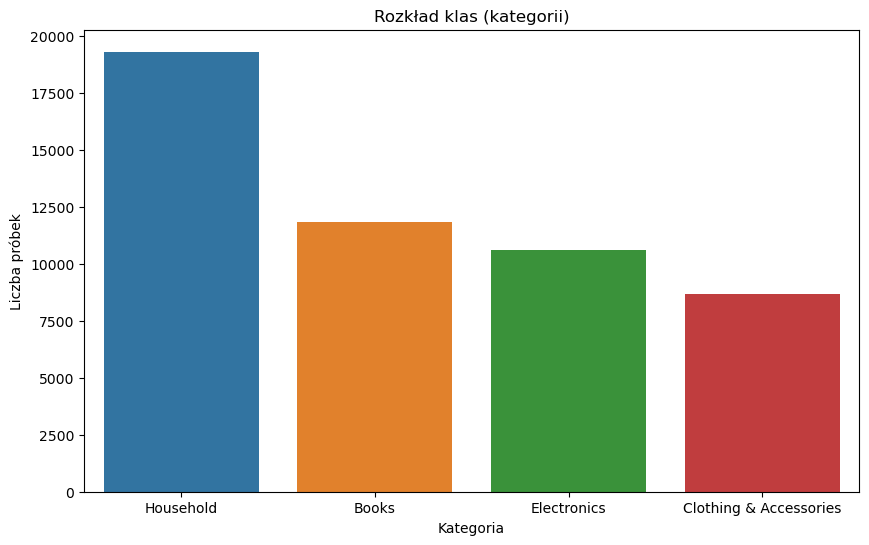

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Rozkład klas (kategorii)')
plt.ylabel('Liczba próbek')
plt.xlabel('Kategoria')
plt.show()

## Analiza długości tekstów (liczby słów i znaków)

array([[<Axes: title={'center': 'num_words'}>,
        <Axes: title={'center': 'num_chars'}>]], dtype=object)

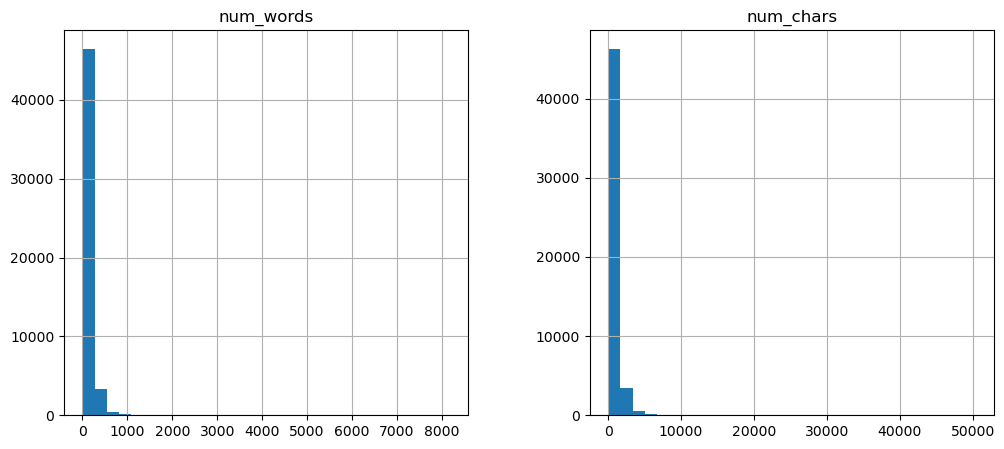

In [11]:
df['num_words'] = df['description'].apply(lambda x: len(str(x).split()))
df['num_chars'] = df['description'].apply(lambda x: len(str(x)))

# Histogram długości
df[['num_words', 'num_chars']].hist(bins=30, figsize=(12,5))


### Zbliżenie na histogramy

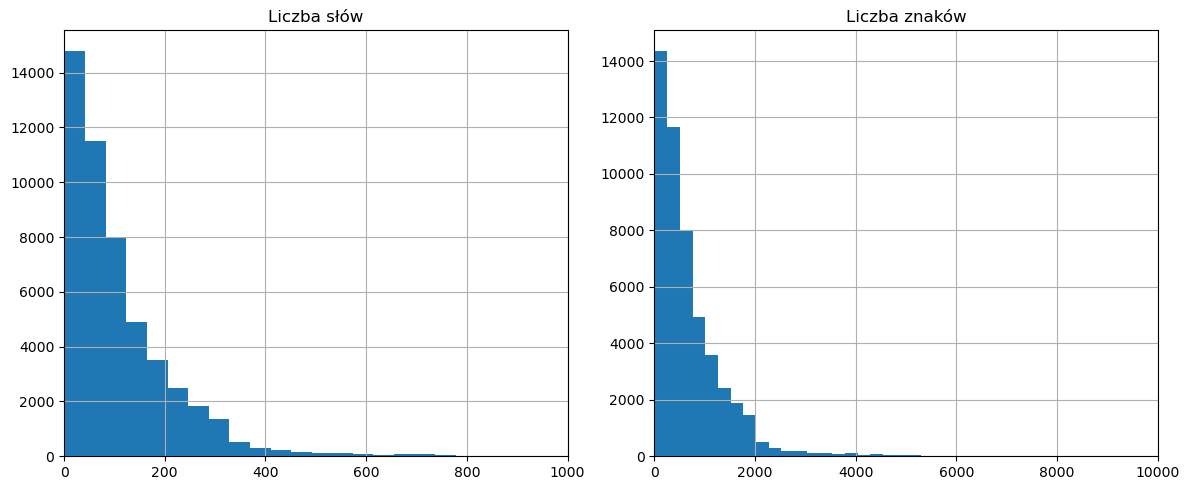

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['num_words'].hist(bins=200, ax=axes[0])
axes[0].set_title('Liczba słów')
axes[0].set_xlim(0, 1000)

df['num_chars'].hist(bins=200, ax=axes[1])
axes[1].set_title('Liczba znaków')
axes[1].set_xlim(0, 10000)

plt.tight_layout()
plt.show()

### Histogramy zogarytmowanych wartości

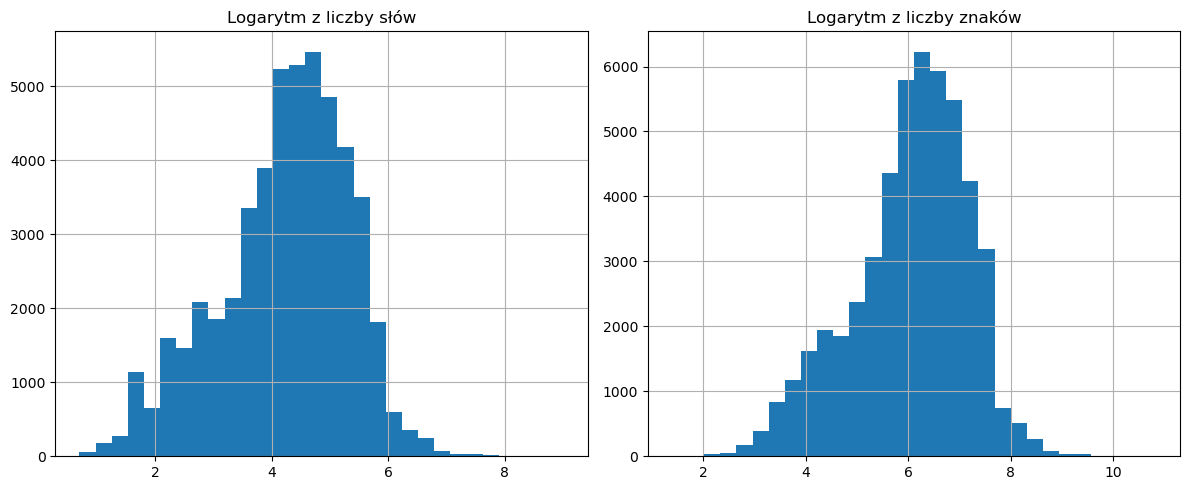

In [13]:
df['log_num_words'] = np.log1p(df['num_words'])
df['log_num_chars'] = np.log1p(df['num_chars'])


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['log_num_words'].hist(bins=30, ax=axes[0])
axes[0].set_title('Logarytm z liczby słów')

df['log_num_chars'].hist(bins=30, ax=axes[1])
axes[1].set_title('Logarytm z liczby znaków')

plt.tight_layout()
plt.show()

### Boxploty

<Axes: >

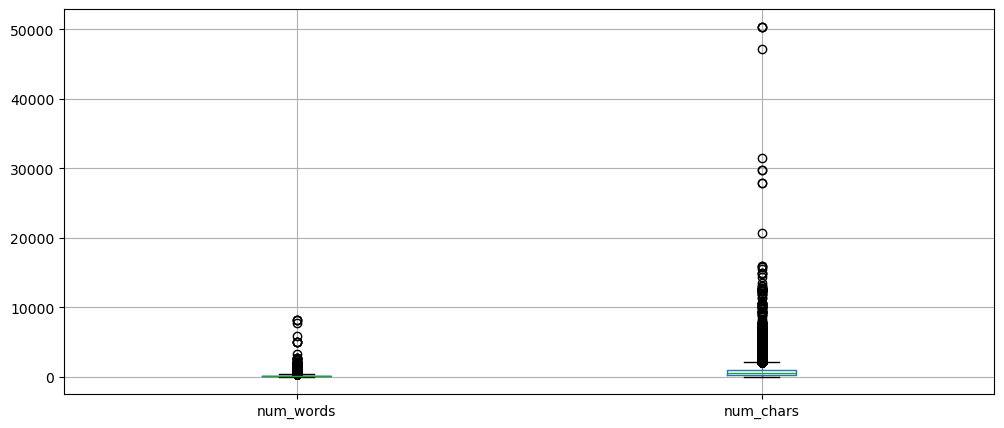

In [10]:
df[['num_words', 'num_chars']].boxplot(figsize=(12,5))

In [11]:
df[['num_words', 'num_chars']].describe()

,num_words,num_chars
count,50425.000000,50425.000000
mean,114.182053,714.098245
std,157.806212,973.370049
min,1.000000,3.000000
25%,34.000000,219.000000
50%,78.000000,487.000000
75%,152.000000,954.000000
max,8181.000000,50403.000000


## Duplikaty opisów

In [13]:
# Unikalne opisy
print(f"Liczba unikalnych opisów: {df['description'].nunique()}")

Liczba unikalnych opisów: 27802


In [14]:
desc_counts = df['description'].value_counts()

duplicates_df = desc_counts[desc_counts > 1].reset_index()
duplicates_df.columns = ['description', 'count']

duplicates_df.head(10)

,description,count
0,Think & Grow Rich About the Author NAPOLEON HI...,30
1,The Power of Your Subconscious Mind: Unlock Yo...,29
2,HP 680 Original Ink Advantage Cartridge (Black...,26
3,Diverse Men's Formal Shirt Diverse is a wester...,23
4,Cubetek 2 in 1 Bluetooth Transmitter & Receive...,22
5,Philips BHS386 Kera Shine Straightener (Purple...,20
6,Littly Front Open Kids Thermal Top & Pyjama Se...,19
7,India Meets India Aum Cum Steel Tongue Happy D...,19
8,Omnimount -Oecms-Neoprene-Cable-Management Omn...,19
9,CBSE Chemistry Chapterwise Solved Papers Class...,19


In [6]:
df = df.drop_duplicates()

In [7]:
df.reset_index(inplace = True)

## Krótkie opisy

In [17]:
# Krótkie opisy (mniej niż 5 słów)
short_descriptions = df[df['num_words'] < 5]
print(f"Znaleziono {short_descriptions.shape[0]} bardzo krótkich opisów.")

Znaleziono 536 bardzo krótkich opisów.


In [18]:
short_descriptions.head()

,index,category,description,num_words,num_chars
581,832,Household,Quechua Arpenaz 50 Hammock,4,26
909,1365,Household,Ebee Multipurpose Rack (Blue),4,29
1341,2205,Household,Tulip Recliner Chair (Black),4,28
1592,2674,Household,Defianz Sit-Stand Desktop Workstation,4,37
2884,4965,Household,Colouring Book of Rangoli,4,26


## Analiza najczęściej występujących słów

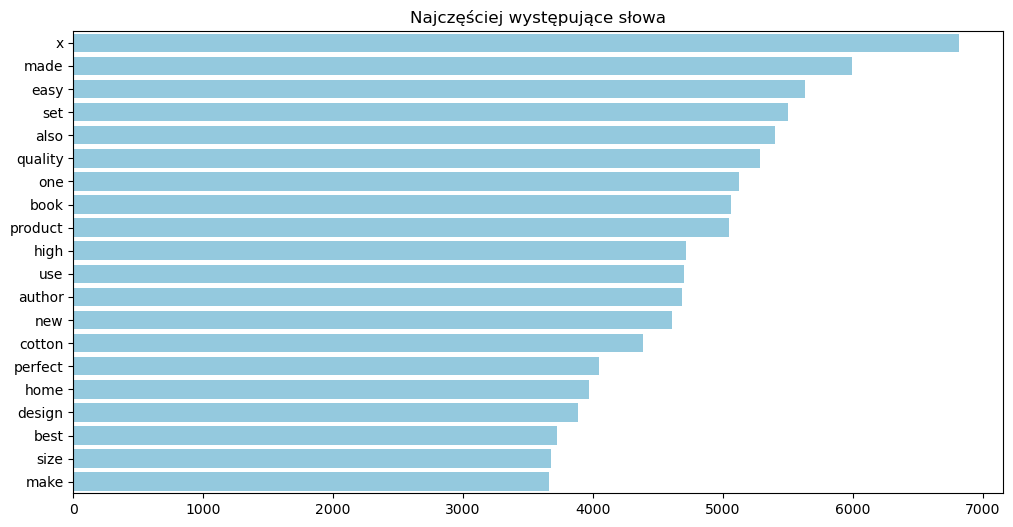

In [19]:
from collections import Counter
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Łączenie wszystkich opisów w jeden tekst
all_words = ' '.join(df['description']).lower().split()
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

word_freq = Counter(filtered_words)
common_words = word_freq.most_common(20)

# Wykres
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words), color='skyblue')
plt.title('Najczęściej występujące słowa')
plt.show()


## Chmura słów

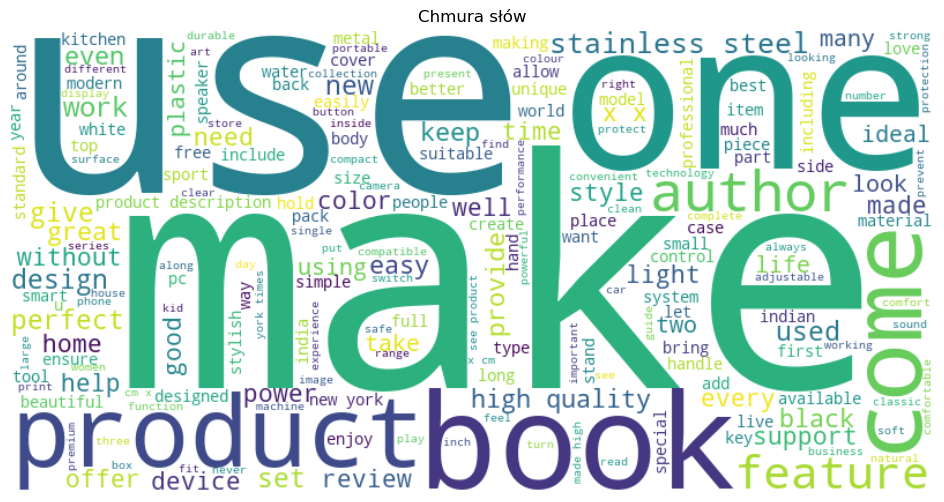

In [20]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura słów')
plt.show()


## TF-IDF (Term Frequency – Inverse Document Frequency)
TF-IDF to miara, która ocenia jak ważne jest dane słowo w konkretnym dokumencie, uwzględniając to, jak często występuje w całym zbiorze dokumentów.
TF-IDF podkreśla słowa charakterystyczne dla danego dokumentu, ignorując słowa bardzo ogólne (np. "the", "is", "product").


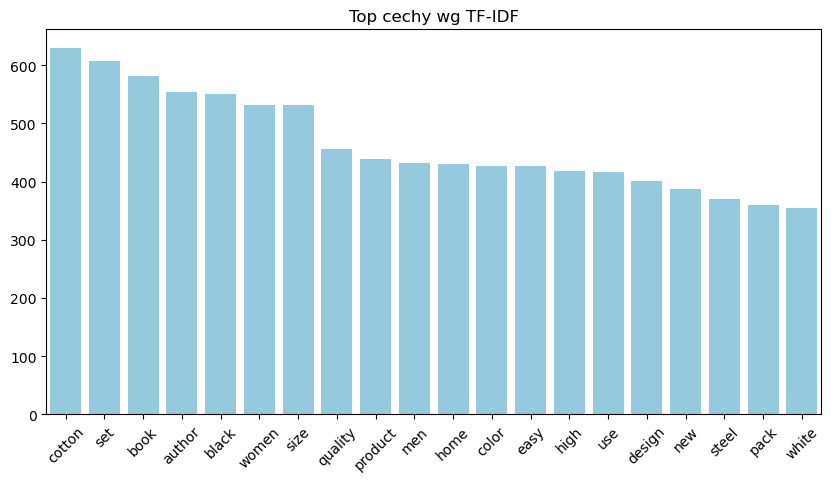

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Unigramy i bigramy
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(df['description'])

# Najważniejsze cechy wg tf-idf
feature_array = tfidf.get_feature_names_out()
tfidf_sorting = X_tfidf.toarray().sum(axis=0).argsort()[::-1]
top_n = 20
top_features = feature_array[tfidf_sorting][:top_n]

# Wykres
plt.figure(figsize=(10,5))
sns.barplot(x=top_features, y=X_tfidf.toarray().sum(axis=0)[tfidf_sorting][:top_n], color='skyblue')
plt.xticks(rotation=45)
plt.title('Top cechy wg TF-IDF')
plt.show()


## n-gramy (np. unigramy, bigramy)
Ciągi kolejnych słów w tekście.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizer: bigramy i trigramy, bez stop words
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X = vectorizer.fit_transform(df['description'])

# Sumujemy wystąpienia
ngrams_freq = X.sum(axis=0)
ngrams = [(word, ngrams_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
ngrams_sorted = sorted(ngrams, key=lambda x: x[1], reverse=True)


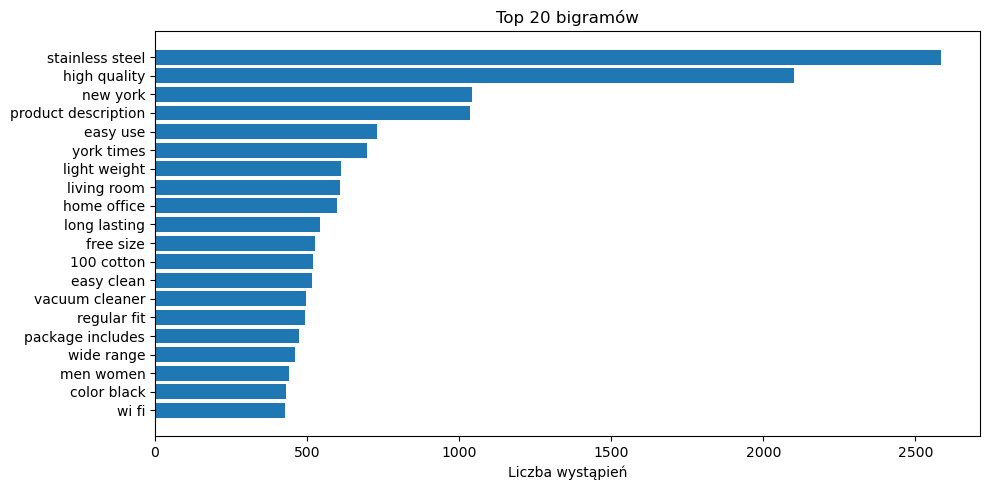

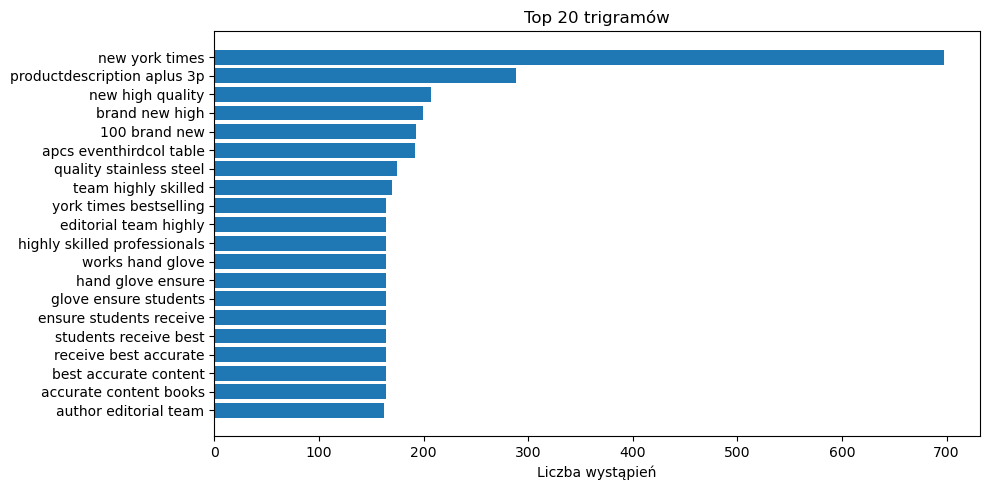

In [23]:
import matplotlib.pyplot as plt

# Oddzielnie bigramy i trigramy
bigrams = [x for x in ngrams_sorted if len(x[0].split()) == 2][:20]
trigrams = [x for x in ngrams_sorted if len(x[0].split()) == 3][:20]

# Wykres
def plot_ngrams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10,5))
    plt.barh(words[::-1], counts[::-1])
    plt.title(title)
    plt.xlabel('Liczba wystąpień')
    plt.tight_layout()
    plt.show()

plot_ngrams(bigrams, 'Top 20 bigramów')
plot_ngrams(trigrams, 'Top 20 trigramów')


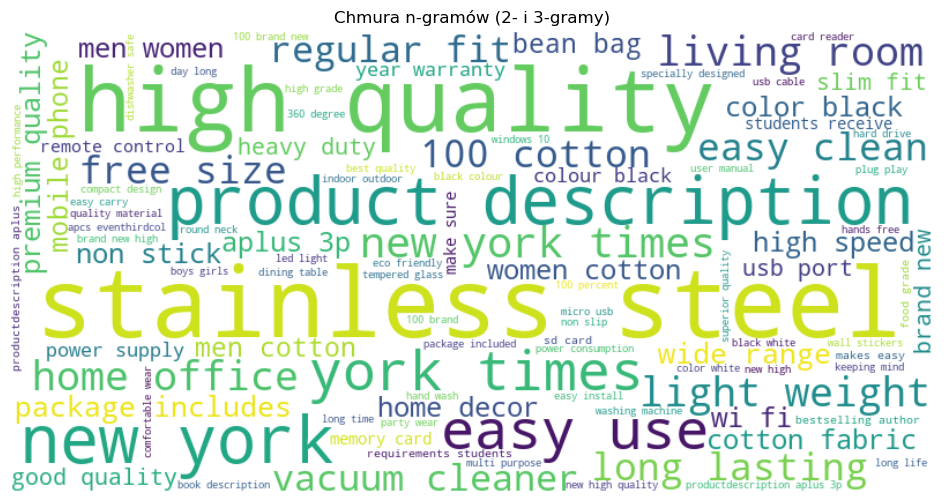

In [24]:
# Słownik: {ngram: count}
ngram_dict = dict(ngrams_sorted[:100])

# Tworzenie chmury
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ngram_dict)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura n-gramów (2- i 3-gramy)')
plt.show()


## Stemming i lematyzacja

In [28]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

#nltk.download('punkt')
#nltk.download('punkt_tab')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Przykładowe zdanie
text = "He studies better and played games while studying different topics."
tokens = word_tokenize(text.lower())
words = [w for w in tokens if w.isalpha()] 

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Zastosowanie
stemmed = [stemmer.stem(w) for w in words]
lemmatized = [lemmatizer.lemmatize(w) for w in words]

# Tworzenie tabeli porównawczej
df_compare = pd.DataFrame({
    'Original': words,
    'Stemmed': stemmed,
    'Lemmatized': lemmatized
})

df_compare


[nltk_data] Downloading package punkt_tab to
,[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
,[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


,Original,Stemmed,Lemmatized
0,he,he,he
1,studies,studi,study
2,better,better,better
3,and,and,and
4,played,play,played
5,games,game,game
6,while,while,while
7,studying,studi,studying
8,different,differ,different
9,topics,topic,topic


## Złożoność tekstów (średnia długość słów, liczba unikalnych słów)

array([[<Axes: title={'center': 'avg_word_length'}>,
        <Axes: title={'center': 'unique_words'}>]], dtype=object)

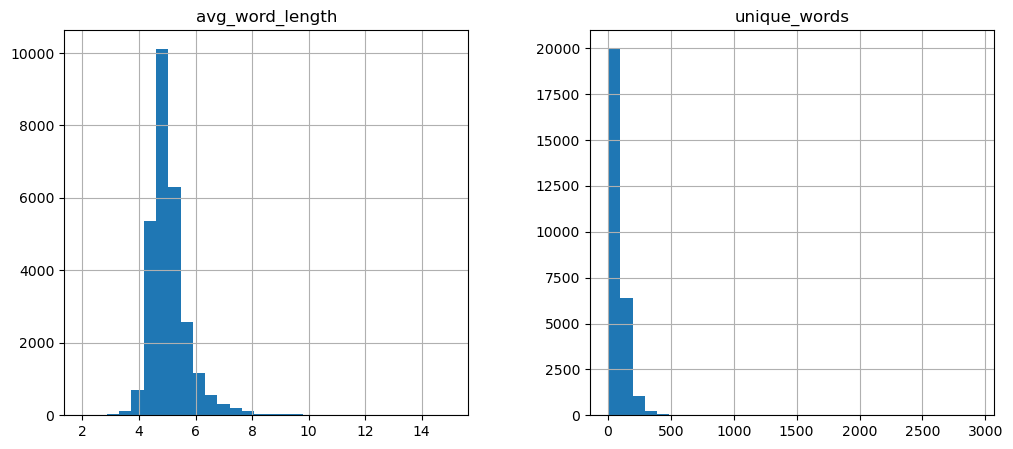

In [29]:
df['avg_word_length'] = df['description'].apply(lambda x: np.mean([len(word) for word in str(x).split() if word.isalpha()]))
df['unique_words'] = df['description'].apply(lambda x: len(set(str(x).split())))

df[['avg_word_length', 'unique_words']].hist(bins=30, figsize=(12,5))


## Flesch Reading Ease

Test Flescha-Kincaida to test czytelności mający na celu wskazanie stopnia trudności zrozumienia tekstu w języku angielskim, gdzie im wyższy wynik tym tekst jest łatwiejszy do przeczytania.

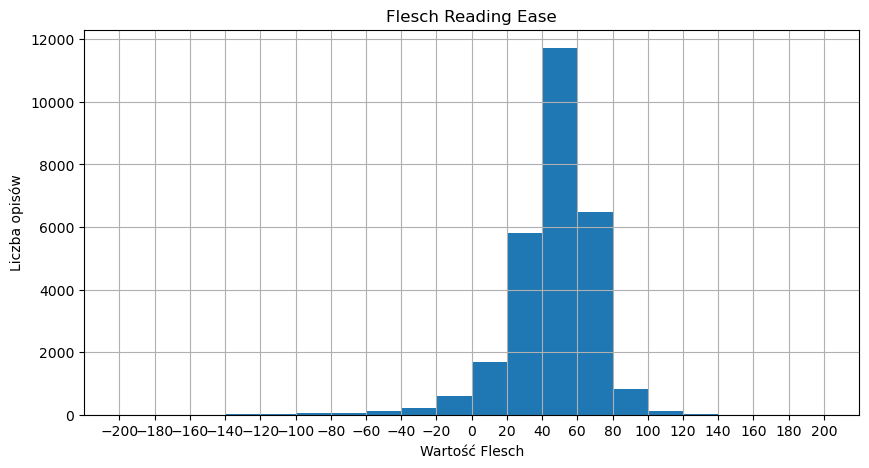

In [30]:
import textstat

df['flesch'] = df['description'].apply(textstat.flesch_reading_ease)

bins = np.arange(-200, 201, 20)
df['flesch'].hist(bins=bins, figsize=(10,5))

plt.title("Flesch Reading Ease")
plt.xlabel("Wartość Flesch")
plt.ylabel("Liczba opisów")
plt.xticks(np.arange(-200, 201, 20))
plt.show()

## Analiza sentymentu

Rozkład sentymentu:
,count    27802.000000
,mean         0.176165
,std          0.170831
,min         -0.800000
,25%          0.047760
,50%          0.177924
,75%          0.280598
,max          1.000000
,Name: sentiment, dtype: float64


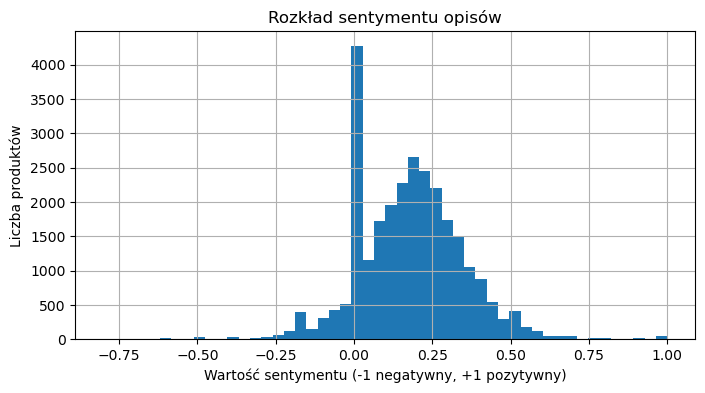

In [31]:
from textblob import TextBlob

df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)

print("Rozkład sentymentu:")
print(df['sentiment'].describe())

import matplotlib.pyplot as plt
df['sentiment'].hist(bins=50, figsize=(8,4))
plt.title('Rozkład sentymentu opisów')
plt.xlabel('Wartość sentymentu (-1 negatywny, +1 pozytywny)')
plt.ylabel('Liczba produktów')
plt.show()


## Korelacja słów z kategoriami

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

# Funkcja top N słów w danej kategorii
def top_words_by_category(df, category_col, text_col, top_n=10):
    result = {}
    categories = df[category_col].unique()
    
    for cat in categories:
        texts = df[df[category_col] == cat][text_col]
        vec = CountVectorizer(stop_words='english')
        X = vec.fit_transform(texts)
        total = X.sum(axis=0)
        freq = [(word, total[0, idx]) for word, idx in vec.vocabulary_.items()]
        sorted_freq = sorted(freq, key=lambda x: x[1], reverse=True)[:top_n]
        result[cat] = sorted_freq
    return result


top_words = top_words_by_category(df, 'category', 'description')

for cat, words in top_words.items():
    print(f"\n📂 Kategoria: {cat}")
    for word, count in words:
        print(f"{word}: {count}")



,📂 Kategoria: Household
,set: 4296
,home: 4264
,use: 4135
,easy: 3848
,steel: 3387
,size: 3331
,quality: 3269
,color: 3168
,product: 2974
,water: 2757
,
,📂 Kategoria: Books
,book: 6082
,author: 5032
,new: 2707
,books: 2333
,world: 2061
,review: 2025
,life: 1715
,university: 1664
,times: 1540
,years: 1477
,
,📂 Kategoria: Clothing & Accessories
,cotton: 3694
,women: 3535
,men: 2567
,wear: 2553
,size: 2410
,fit: 1961
,fabric: 1840
,look: 1825
,set: 1501
,soft: 1454
,
,📂 Kategoria: Electronics
,usb: 3273
,camera: 2399
,black: 2338
,high: 2249
,power: 2195
,cable: 1970
,bluetooth: 1906
,audio: 1776
,wireless: 1729
,phone: 1704


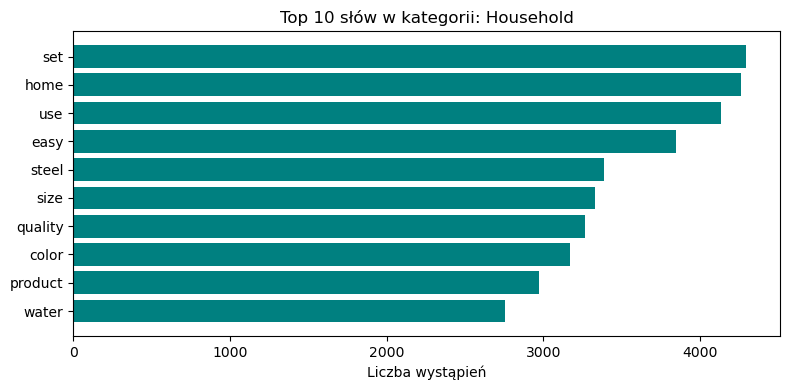

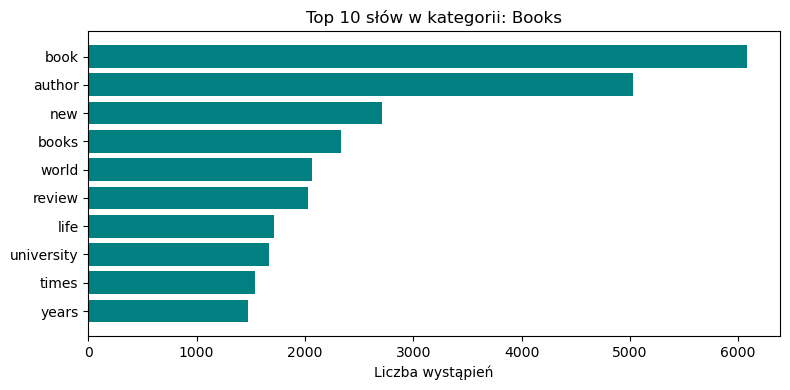

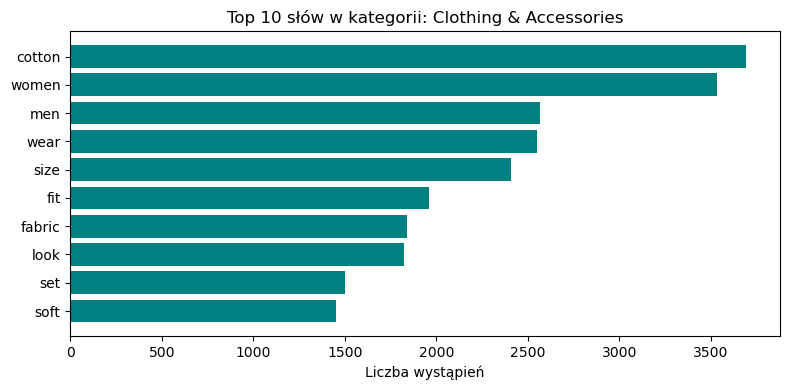

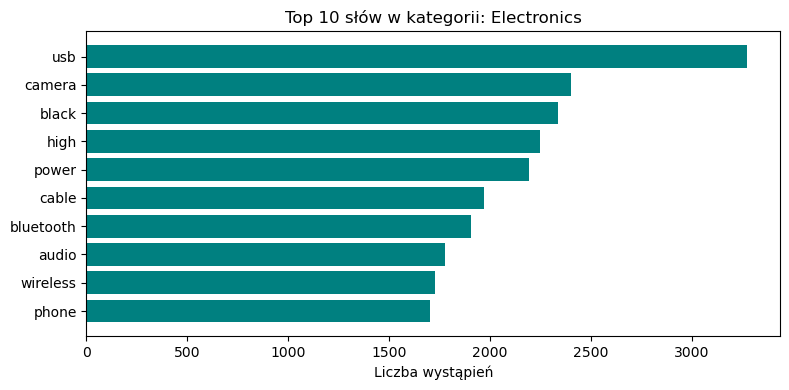

In [33]:
# Funkcja do wizualizacji top N słów w kategorii
def plot_top_words_per_category(top_words_dict, top_n=10):
    for category, words in top_words_dict.items():
        
        words = words[:top_n]
        terms, counts = zip(*words)

        plt.figure(figsize=(8, 4))
        plt.barh(terms[::-1], counts[::-1], color='teal')
        plt.title(f"Top {top_n} słów w kategorii: {category}")
        plt.xlabel("Liczba wystąpień")
        plt.tight_layout()
        plt.show()

plot_top_words_per_category(top_words)


# Etap: Drugi Kamień Milowy

## Przetwarzanie tekstu (tokenizacja, usuwanie znaków, stopwords, lematyzacja)
Aby nie utracić informacji zdecydowaliśmy się nie używać stemmingu.

In [7]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Funkcja do przetwarzania tekstu
def preprocess_text(text):
    # Czyszczenie: tylko litery
    text = re.sub(r'[^a-zA-Z]', ' ', str(text).lower())
    tokens = text.split()

    # Usuwanie stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # lematyzacja
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

df['clean_text'] = df['description'].apply(lambda x: preprocess_text(x))

## TF-IDF Vectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(df['clean_text'])

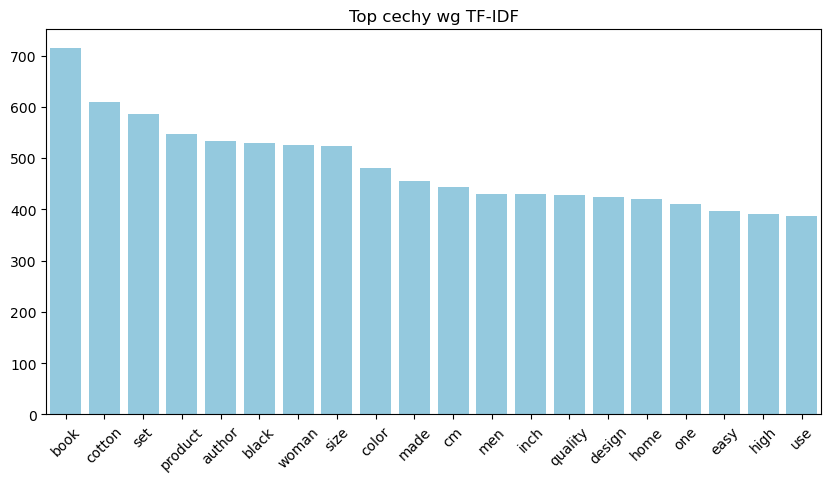

In [12]:
# Najważniejsze cechy wg tf-idf
feature_array = tfidf.get_feature_names_out()
tfidf_sorting = X_tfidf.toarray().sum(axis=0).argsort()[::-1]
top_n = 20
top_features = feature_array[tfidf_sorting][:top_n]

# Wykres
plt.figure(figsize=(10,5))
sns.barplot(x=top_features, y=X_tfidf.toarray().sum(axis=0)[tfidf_sorting][:top_n], color='skyblue')
plt.xticks(rotation=45)
plt.title('Top cechy wg TF-IDF')
plt.show()

## PCA

Możliwa interpretacja: Dane mają 3 główne kierunki wariancji (kształt Y). PCA nie oddziela ich wyraźnie, ale sugeruje istnienie podstruktur. Większość dokumentów ma podobny profil słów i różnią się dopiero w bardziej szczegółowych kierunkach (ramionach Y).

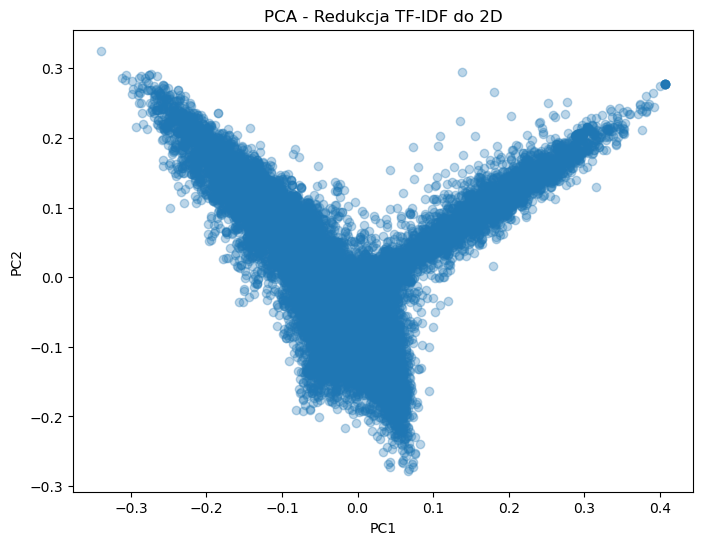

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.3)
plt.title("PCA - Redukcja TF-IDF do 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## t-SNE

In [22]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=50)
X_pca1 = pca1.fit_transform(X_tfidf.toarray())

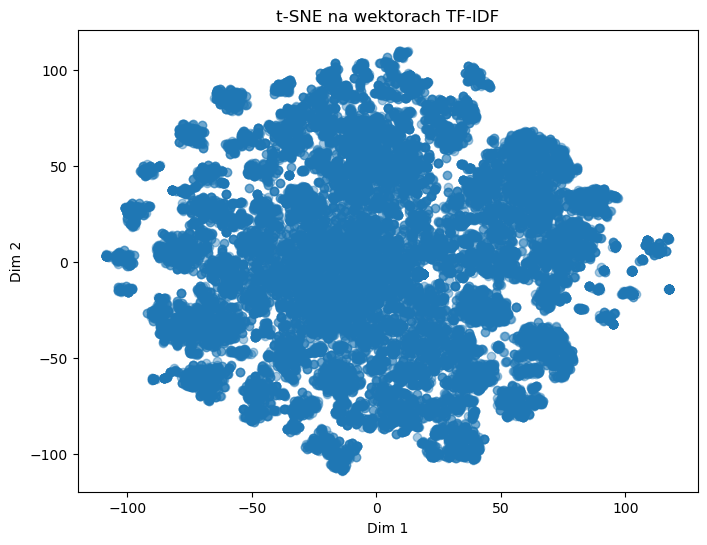

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
#X_tsne = tsne.fit_transform(X_tfidf[:2000].toarray())
X_tsne = tsne.fit_transform(X_pca1)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.4)
plt.title("t-SNE na wektorach TF-IDF")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

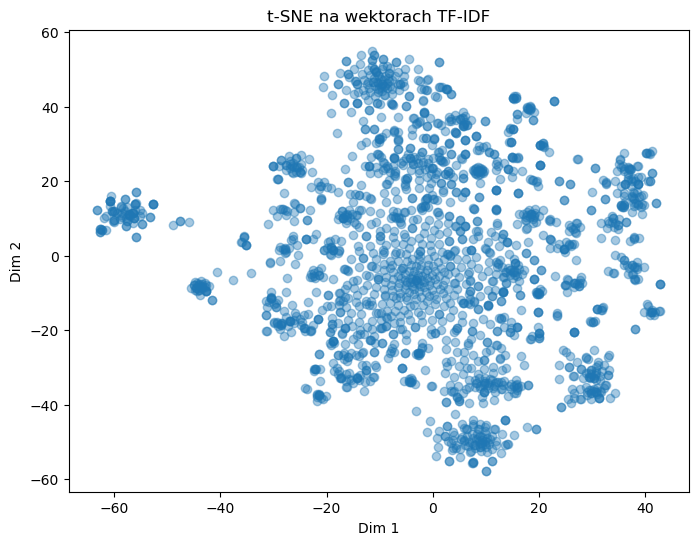

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne1 = tsne.fit_transform(X_tfidf[:2000].toarray())

plt.figure(figsize=(8,6))
plt.scatter(X_tsne1[:,0], X_tsne1[:,1], alpha=0.4)
plt.title("t-SNE na wektorach TF-IDF")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

## UMAP

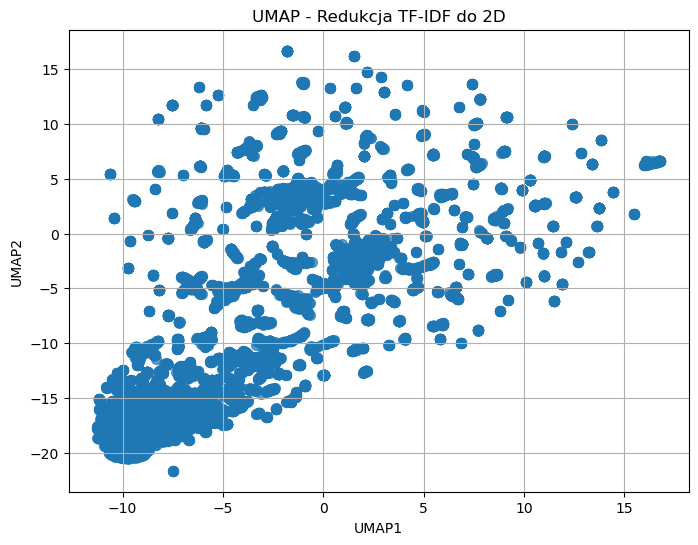

In [9]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_tfidf)


plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=50, alpha=0.7)
plt.title("UMAP - Redukcja TF-IDF do 2D")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.grid(True)
plt.show()

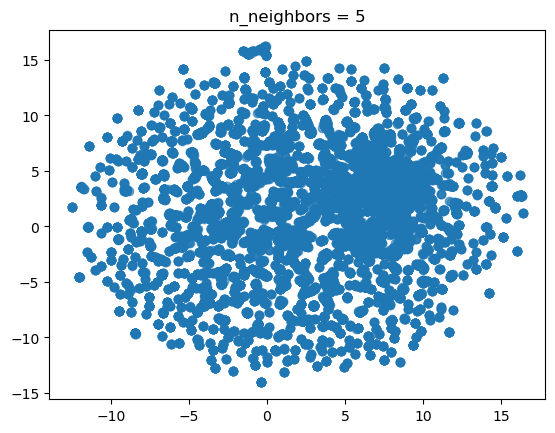

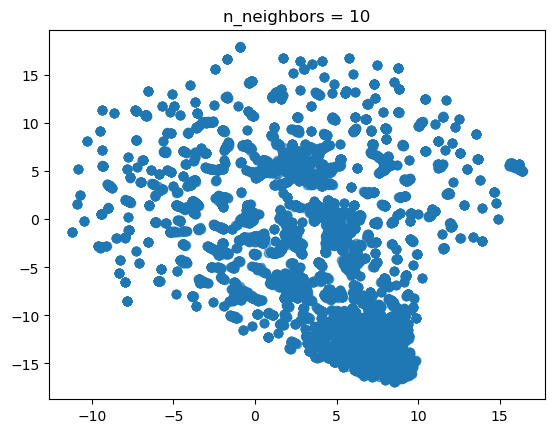

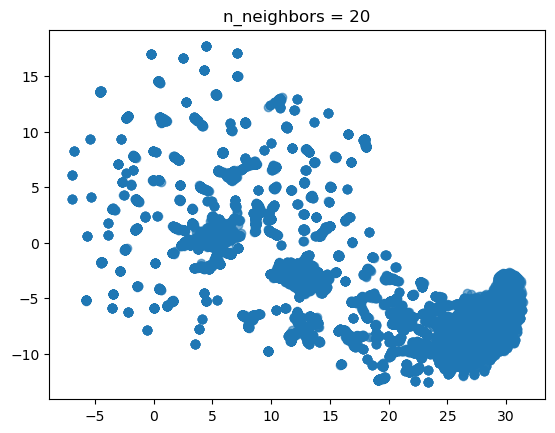

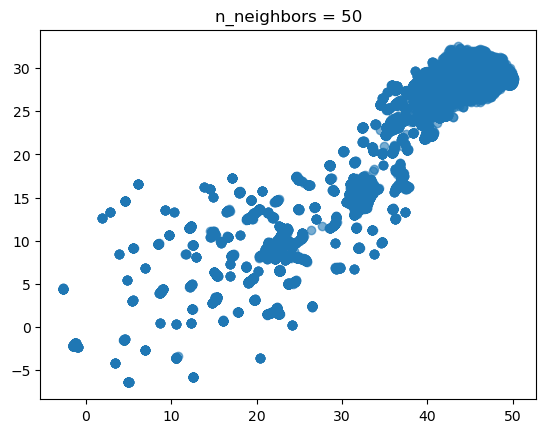

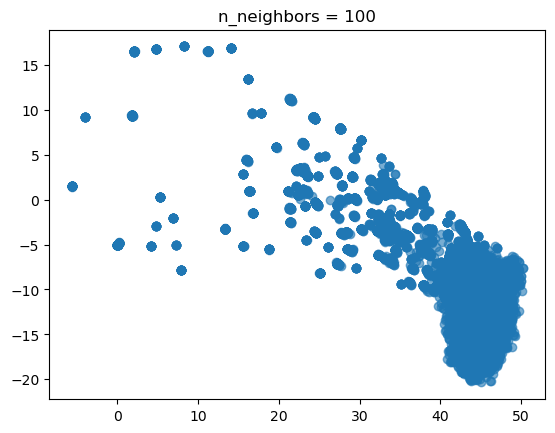

In [11]:
for n in [5, 10, 20, 50, 100]:
    reducer = UMAP(n_neighbors=n, min_dist=0.1, random_state=42)
    embedding = reducer.fit_transform(X_tfidf)
    plt.scatter(embedding[:,0], embedding[:,1], alpha=0.6)
    plt.title(f"n_neighbors = {n}")
    plt.show()

## Word2Vec

In [12]:
from gensim.models import Word2Vec

# wstępne trenowanie Word2Vec
w2v_model = Word2Vec(sentences=df['clean_text'], vector_size=100, window=5, min_count=2, workers=4)

def get_mean_embedding(doc):
    words = [word for word in doc if word in w2v_model.wv]
    if not words:
        return np.zeros(100)
    return np.mean(w2v_model.wv[words], axis=0)

X_w2v = np.array([get_mean_embedding(doc) for doc in df['clean_text']])

print(X_w2v.shape)

(27802, 100)


In [13]:
print(X_w2v[:1])

[[ 6.20760359e-02  1.17552802e-01  8.99250712e-03  7.61568919e-02
,   2.86790468e-02 -1.52570546e-01 -2.12583244e-01  1.21196717e-01
,  -1.36055171e-01  9.40079684e-04 -6.43292069e-02  5.34857474e-02
,   1.53848939e-02 -3.09480522e-02  1.34362072e-01 -2.69469842e-02
,   5.21656498e-02  2.22995076e-02 -8.07975698e-03 -7.53761083e-02
,  -4.29941043e-02  9.81570408e-02 -8.71857107e-02 -1.28863007e-01
,   1.44891560e-01  1.01579510e-01  2.81331297e-02  8.12482461e-02
,   3.34547125e-02  8.27254504e-02  5.16153723e-02 -1.17707536e-01
,  -1.57123692e-02 -5.28459102e-02 -1.13988761e-04 -4.23094854e-02
,   8.45804289e-02  1.26757607e-01  4.18144092e-02  1.39321774e-01
,   9.89380013e-03  1.36294067e-01  2.54478641e-02  2.14436483e-02
,   1.39977215e-02 -9.28741768e-02 -3.75574194e-02 -1.92187205e-02
,   6.04852848e-02 -1.08066592e-02  9.36386064e-02  1.12752140e-01
,  -9.47161168e-02 -8.14152807e-02 -1.42359186e-03  5.92792816e-02
,  -6.43545091e-02  7.76502788e-02  8.68129283e-02 -1.30908769e

## BERT

In [43]:
#pip install -U sentence-transformers

In [9]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2') 
X_bert = model.encode(df['description'], show_progress_bar=False)

In [ ]:
#X_bert_mini = model.encode(df['description'].astype(str).head(500).tolist(), show_progress_bar=True)

In [10]:
np.save('bert_embeddings.npy', X_bert)

#X_bert = np.load('bert_embeddings.npy') 

In [11]:
print(X_bert.shape)
print(X_bert[0])

(27802, 384)
,[-8.71555582e-02  8.03194493e-02 -1.58853438e-02 -1.00605106e-02
,  4.06975560e-02  3.35880532e-03  1.08022690e-02 -4.79311049e-02
, -7.95297101e-02 -4.27130014e-02 -4.10575904e-02  7.95246735e-02
,  4.45587188e-02  2.94121653e-02 -3.05420496e-02  4.73322459e-02
,  6.40895870e-03 -3.25844921e-02 -1.55326240e-02  8.09623078e-02
, -3.17822322e-02 -6.83450699e-02 -2.57654730e-02 -2.67407745e-02
,  1.15154358e-02  1.33601762e-02  1.03005162e-02 -1.10780302e-05
,  3.52995247e-02 -6.15326092e-02  6.54668659e-02  3.85827050e-02
, -1.26725333e-02 -1.05477180e-02  7.28996024e-02  5.74382348e-03
,  4.04473357e-02 -2.09893286e-02  1.42648434e-02 -1.40021574e-02
,  9.51872580e-03 -3.93376835e-02 -4.31643426e-02  5.35586104e-02
, -1.81156024e-02 -3.52474973e-02 -2.21590549e-02  1.28278858e-03
, -1.18806744e-02 -2.62597315e-02 -1.95855647e-02 -7.47069642e-02
, -5.85853122e-02 -9.34863687e-02  3.93912978e-02 -2.57534552e-02
,  1.09810382e-03  1.27466647e-02 -2.19984842e-03 -9.07175615e-

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_bert)

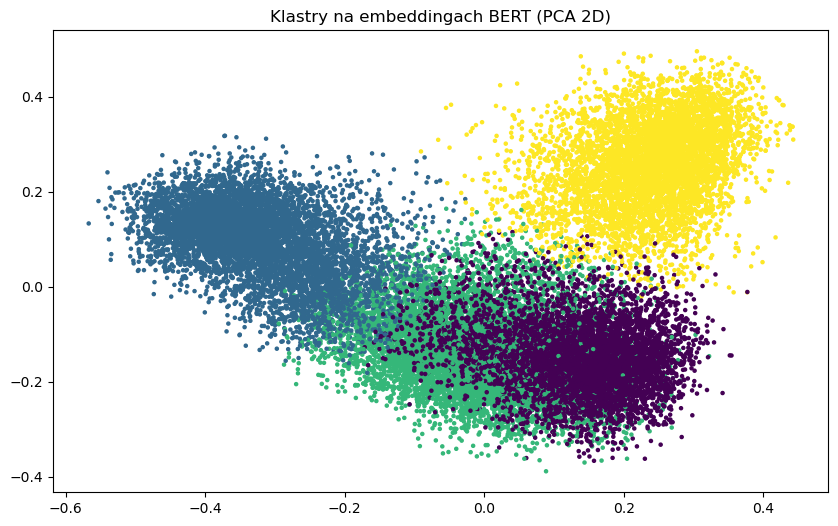

In [15]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
X_2d = pca2.fit_transform(X_bert)

plt.figure(figsize=(10,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters, cmap='viridis', s=5)
plt.title("Klastry na embeddingach BERT (PCA 2D)")
plt.show()

## Metryki czytelności

In [24]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
,You can now load the package via spacy.load('en_core_web_sm')
,⚠ Restart to reload dependencies
,If you are in a Jupyter or Colab notebook, you may need to restart Python in
,order to load all the package's dependencies. You can do this by selecting the
,'Restart kernel' or 'Restart runtime' option.


In [17]:
import spacy
import textdescriptives as td

nlp = spacy.load("en_core_web_sm")

nlp.add_pipe("textdescriptives/readability")


In [18]:
docs = list(nlp.pipe(df['description'].astype(str).head(500)))

readability_df = td.extract_df(docs)

readability_df.head()

,text,token_length_mean,token_length_median,token_length_std,sentence_length_mean,sentence_length_median,sentence_length_std,syllables_per_token_mean,syllables_per_token_median,syllables_per_token_std,...,n_characters,n_sentences,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix
0,Paper Plane Design Framed Wall Hanging Motivat...,4.780702,4.0,2.304682,22.800000,19.5,9.389356,1.355263,1.0,0.682564,...,1111,10,69.037737,9.294105,10.355216,11.927018,12.487105,11.012281,46.484211,5.400000
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",4.694915,5.0,2.188214,29.500000,29.5,4.500000,1.322034,1.0,0.534906,...,288,2,65.048432,11.515000,NaN,13.155932,15.433051,10.802712,53.228814,7.000000
2,SAF 'UV Textured Modern Art Print Framed' Pain...,4.676856,4.0,5.755608,19.083333,18.0,10.111531,1.283843,1.0,0.607631,...,986,12,78.852316,7.001845,8.598638,9.554731,10.139658,10.148821,39.170670,3.833333
3,"SAF Flower Print Framed Painting (Synthetic, 1...",4.734043,4.0,6.210279,18.800000,16.5,10.543244,1.287234,1.0,0.612326,...,801,10,78.853000,6.931362,8.841846,9.647660,10.267340,10.461702,37.417021,3.500000
4,Incredible Gifts India Wooden Happy Birthday U...,4.298913,4.0,2.109193,16.727273,13.0,8.023725,1.228261,1.0,0.582410,...,804,11,85.945949,5.427115,8.296473,8.647431,7.181517,7.708043,32.488142,2.636364


## Flesch reading ease versus inne

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=readability_df[['flesch_kincaid_grade', 'smog', 'gunning_fog']])
plt.title('Porównanie metryk trudności czytania')
plt.ylabel('Wartość metryki')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='flesch_reading_ease',
    y='lix',
    data=readability_df,
    hue='sentence_length_mean',
    palette='viridis'
)
plt.title('Flesch Reading Ease vs LIX')
plt.xlabel('Flesch Reading Ease')
plt.ylabel('LIX')
plt.legend(title='Śr. długość zdań')
plt.grid(True)
plt.show()

## Heatmapa korelacji metryk czytelności

In [ ]:
plt.figure(figsize=(12,10))
corr = readability_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Macierz korelacji metryk czytelności')
plt.show()